#### Package installation

In the code cell below, I import all of the packages that I will use throughout this notebook.

In [335]:
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

### Task 1
#### Source the Data Set

**Purpose of code cells in Task 1**

In the code cell below, I use the scikit.learn library's datasets() function to load the Iris dataset, the dataset that I'll be working with throughout the course.

This function allows a user to load popular datasets for learning machine learning techniques. The Iris dataset is just one such dataset and is called using sklearn.datasets.load_iris()

I've imported sklearn.datasets as datasets. I used [this resource](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris) to learn how to use this module.


**Reflection on output**

I store the Iris dataset as the variable 'data', and simply call it by inputting 'data' in order to inspect the dataset in full.

This function returns a dictionary of key-value pairs. The first key-value pair, for instance, is 'data', corresponding to an array of floating point values. These are the measurements for each feature.

Another key-value pair is the feature names themselves, stored as 'feature_names' and corresponding to a list of features (sepal length (cm), sepal width (cm), etc.).

The 'target' key corresponds to a list of values ranging from 0 to 2. These denote the species of Iris flower, which are stored as a list corresponding to another key: 'target_names'. When I view the  target_names variable for instance, the array (['setosa', 'veriscolour', 'virginica']) is returned. The sklearn.datasets() function has identified that these are categorical variables that repeat and has accordingly identified them as our classification target and assinged them a number 0 through 2.

In the two code cells that follow, I check what is stored under the variables 'target_names' and 'feature_names' by [indexing](https://www.askpython.com/python/list/indexing-in-python).



In [336]:
# using the sklearn.datasets() function to load in the iris data and storing it under the variable name 'data'
data = datasets.load_iris()

# calling the data variable to display the iris data
data


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [337]:
# checking what have been idenified as the target names or class identifiers of the dataset by subsetting the data variable with the 'target_names' key
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [338]:
# checking what have been idenified as the feature names or column names of the dataset by subsetting the data variable with the 'feature_names' key
data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Task 2
#### Explore the Data Structure

**Purpose of code cells in Task 2**

First I checked the type of the dataset. Seeing that it was of the class 'sklearn.utils._bunch.Bunch', I decided to convert it into a Pandas DataFrame in order to more efficiently explore the data set. This allows me to specify the data I want in my dataset, and allows me to call the Pandas [.shape](https://www.w3schools.com/python/pandas/ref_df_shape.asp) and [head()](https://www.w3schools.com/python/pandas/ref_df_head.asp) methods which are part of this task.

I imported the pandas library as pd in the first code cell of this notebook. I used [this resource](https://medium.com/@merilainen.vili/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataframe-6806fa42a98e#:~:text=Convert%20Data%20from%20Bunch%20Object,of%20this%20variable%20is%20sklearn) as an aid in converting the iris dataset as it was loaded in by the sklearn.datasets function, to a more workable Pandas Data Frame.

According to [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html), the pd.Data_Frame method accepts the following parameters: data, index, columns, dtype, copy. I wanted the feature_names (petal length (cm), sepal length (cm), petal width (cm), sepal width (cm)) as the columns in my Data Frame, so I need to pass the feature_names variable to the pd.DataFrame's 'columns' argument.

`df = pd.DataFrame(data.data, columns=data.feature_names)`

Then I wanted to add in the appropriate species name in to each row, by cross referencing the species names data (versicolour, virginica, setosa) with the target data (0, 1, 3). I had orgininally used a conditional statement to do this, but found a more efficient way by using the [slicing and indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) functionality Pandas offers. I read [this tutorial](https://www.w3schools.com/python/python_lists_comprehension.asp) on list comprehension in order to execute this. This is the resulting code:

`df['species_name'] = [data.target_names[target] for target in data.target]`

**Reflection on output**

- the shape of the dataset
    - When I print the shape of the data set using the .shape method, python returns 150,5, indicating that there are 150 rows and 5 columns in the df dataframe that I've created out of the Iris dataset.
- the first and last 5 rows
    - I used the head() and tail() methods to print the first and last 5 rows of the data set. This shows me that as instructed, python has created a data frame for me that contains 4 columns corresponding to the feature names in the iris data set (sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)).

In [339]:
# checking type of the variable 'data'
print(type(data))

# the type that was returned was a dictionary, so we can convert the dictionary to a pandas dataframe in order to view the data in a tabular format
# and use functions such as head(), tail() and .shape to explore the data
# I use the pd.DataFrame() function to convert the data to a pandas dataframe, specifying the data as the first argument and the column names as the second argument
df = pd.DataFrame(data.data, columns=data.feature_names)

# I want to be able to view the class ID (0, 1, 2) and species name (setosa, versicolor, virginica) for each flower in the dataset, as this will make it easier to understand at a glance
# and will make later data analysis easier
# to do this, I add a new column to the dataframe called 'species_name' and map the target values (0, 1, 2) to the corresponding species names using the target_names key
# This is called list comprehension
df['species_name'] = [data.target_names[target] for target in data.target]

# I reorder so that the species_id column is the first column in the dataframe
# I used [this resource](https://docs.kanaries.net/topics/Pandas/pandas-reorder-columns) to help me with this
df = df.reindex(['species_name', 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], axis=1)


# now I look at the dataset using the .shape, .head() and .tail() functions to see the first 5 rows, last 5 rows and the shape of the dataset
print(df.shape)

# printing the first 5 rows
print(df.head(5))

# printing last 5 rows
print(df.tail(5))



<class 'sklearn.utils._bunch.Bunch'>
(150, 5)
  species_name  sepal length (cm)  sepal width (cm)  petal length (cm)  \
0       setosa                5.1               3.5                1.4   
1       setosa                4.9               3.0                1.4   
2       setosa                4.7               3.2                1.3   
3       setosa                4.6               3.1                1.5   
4       setosa                5.0               3.6                1.4   

   petal width (cm)  
0               0.2  
1               0.2  
2               0.2  
3               0.2  
4               0.2  
    species_name  sepal length (cm)  sepal width (cm)  petal length (cm)  \
145    virginica                6.7               3.0                5.2   
146    virginica                6.3               2.5                5.0   
147    virginica                6.5               3.0                5.2   
148    virginica                6.2               3.4                5.4 

### Task 3
#### Summarising the dataset

**Purpose of code cells in Task 3**

In the code cells below, I generate statistical summaries of the dataset using the Numpy library's built in aggregate functions. I used [this resource](https://jakevdp.github.io/PythonDataScienceHandbook/02.04-computation-on-arrays-aggregates.html) as a guide.

In the first code cell in this notebook, I've imported Numpy as np.

Numpy has fast built-in aggregation functions for working on arrays, so I convert the dataset into a numpy array below using np.array(). In each code cell I then calculate the various summary statistics for each feature (mean, median, min, max, standard deviation)

In [340]:
# converting the pandas dataframe to a numpy array using the .array() function in order to use its aggregation functions
iris_array = np.array(df)

# checking the result
print(iris_array)

[[np.str_('setosa') 5.1 3.5 1.4 0.2]
 [np.str_('setosa') 4.9 3.0 1.4 0.2]
 [np.str_('setosa') 4.7 3.2 1.3 0.2]
 [np.str_('setosa') 4.6 3.1 1.5 0.2]
 [np.str_('setosa') 5.0 3.6 1.4 0.2]
 [np.str_('setosa') 5.4 3.9 1.7 0.4]
 [np.str_('setosa') 4.6 3.4 1.4 0.3]
 [np.str_('setosa') 5.0 3.4 1.5 0.2]
 [np.str_('setosa') 4.4 2.9 1.4 0.2]
 [np.str_('setosa') 4.9 3.1 1.5 0.1]
 [np.str_('setosa') 5.4 3.7 1.5 0.2]
 [np.str_('setosa') 4.8 3.4 1.6 0.2]
 [np.str_('setosa') 4.8 3.0 1.4 0.1]
 [np.str_('setosa') 4.3 3.0 1.1 0.1]
 [np.str_('setosa') 5.8 4.0 1.2 0.2]
 [np.str_('setosa') 5.7 4.4 1.5 0.4]
 [np.str_('setosa') 5.4 3.9 1.3 0.4]
 [np.str_('setosa') 5.1 3.5 1.4 0.3]
 [np.str_('setosa') 5.7 3.8 1.7 0.3]
 [np.str_('setosa') 5.1 3.8 1.5 0.3]
 [np.str_('setosa') 5.4 3.4 1.7 0.2]
 [np.str_('setosa') 5.1 3.7 1.5 0.4]
 [np.str_('setosa') 4.6 3.6 1.0 0.2]
 [np.str_('setosa') 5.1 3.3 1.7 0.5]
 [np.str_('setosa') 4.8 3.4 1.9 0.2]
 [np.str_('setosa') 5.0 3.0 1.6 0.2]
 [np.str_('setosa') 5.0 3.4 1.6 0.4]
 

#### Calculating the mean of each feature

In [341]:
# firstly slicing for the sepal length column and then saving that as variable sepal_l_mean
sepal_l_mean = np.mean(iris_array[:, 1])

# Then printing the mean of that feature
print(f"The mean sepal length (cm) is {sepal_l_mean}")

sepal_w_mean = np.mean(iris_array[:, 2])
print(f"The mean sepal width (cm) is {sepal_w_mean}")

petal_l_mean = np.mean(iris_array[:, 3])
print(f"The mean petal length (cm) is {petal_l_mean}")

petal_w_mean = np.mean(iris_array[:, 4])
print(f"The mean petal width (cm) is {petal_w_mean}")

The mean sepal length (cm) is 5.843333333333335
The mean sepal width (cm) is 3.057333333333334
The mean petal length (cm) is 3.7580000000000027
The mean petal width (cm) is 1.199333333333334


#### Calculating the minimum value for each feature

In [342]:
sepal_l_min = np.min(iris_array[:, 1])
print(f"The minimum value for the sepal length (cm) is {sepal_l_min}")

sepal_w_min = np.min(iris_array[:, 2])
print(f"The minimum value for the sepal width (cm) is {sepal_w_min}")

petal_l_min = np.min(iris_array[:, 3])
print(f"The minimum value for the petal length (cm) is {petal_l_min}")

petal_w_min = np.min(iris_array[:, 4])
print(f"The minimim value for the petal width (cm) is {petal_w_min}")

The minimum value for the sepal length (cm) is 4.3
The minimum value for the sepal width (cm) is 2.0
The minimum value for the petal length (cm) is 1.0
The minimim value for the petal width (cm) is 0.1


#### Calculating the maximum value for each feature

In [343]:
sepal_l_max = np.max(iris_array[:, 1])
print(f"The maximum value for the sepal length (cm) is {sepal_l_max}")

sepal_w_max = np.max(iris_array[:, 2])
print(f"The maximum value for the sepal width (cm) is {sepal_w_max}")

petal_l_max = np.max(iris_array[:, 3])
print(f"The maximum value for the petal length (cm) is {petal_l_max}")

petal_w_max = np.max(iris_array[:, 4])
print(f"The maximum value for the petal width (cm) is {petal_w_max}")

The maximum value for the sepal length (cm) is 7.9
The maximum value for the sepal width (cm) is 4.4
The maximum value for the petal length (cm) is 6.9
The maximum value for the petal width (cm) is 2.5


#### Caluclating the standard deviation for each feature

In [344]:
sepal_l_sd = np.std(iris_array[:, 1])
print(f"The standard deviation for the sepal length (cm) is {sepal_l_sd}")

sepal_w_sd = np.std(iris_array[:, 2])
print(f"The standard deviation for the sepal width (cm) is {sepal_w_sd}")

petal_l_sd = np.std(iris_array[:, 3])
print(f"The standard deviation for the petal length (cm) is {petal_l_sd}")

petal_w_sd = np.std(iris_array[:, 4])
print(f"The standard deviation for the petal width (cm) is {petal_w_sd}")

The standard deviation for the sepal length (cm) is 0.8253012917851409
The standard deviation for the sepal width (cm) is 0.43441096773549437
The standard deviation for the petal length (cm) is 1.7594040657753032
The standard deviation for the petal width (cm) is 0.7596926279021594


#### Calculating the median value for each feature

In [345]:
sepal_l_med = np.median(iris_array[:, 1])
print(f"The median value for the sepal length (cm) is {sepal_l_med}")

sepal_w_med = np.median(iris_array[:, 2])
print(f"The median value for the sepal width (cm) is {sepal_w_med}")

petal_l_med = np.median(iris_array[:, 3])
print(f"The median value for the petal length (cm) is {petal_l_med}")

petal_w_med = np.median(iris_array[:, 4])
print(f"The median value for the petal width (cm) is {petal_w_med}")

The median value for the sepal length (cm) is 5.8
The median value for the sepal width (cm) is 3.0
The median value for the petal length (cm) is 4.35
The median value for the petal width (cm) is 1.3


### Task 4
#### Visualise features

**Purpose of code cells in Task 4**

In the code cells below, I plot histograms for each feature using the plotting library, [matplotlib](https://matplotlib.org/stable/api/pyplot_summary.html).

**Reflection on output**

Each histogram generated gives me a sense of the distribution of datapoints for each feature individually. I reflect on the output of each code cell in the markdown cell that precedes it.


### Sepal Length (cm)

This histogram shows the Sepal Length (cm) data. I played around with number of bins, and found that 3 bins gave me the clearest insight, which is that the majority of iris flowers regardless of species have sepal width in the range of approximately 5.5 to 6.5 cm.

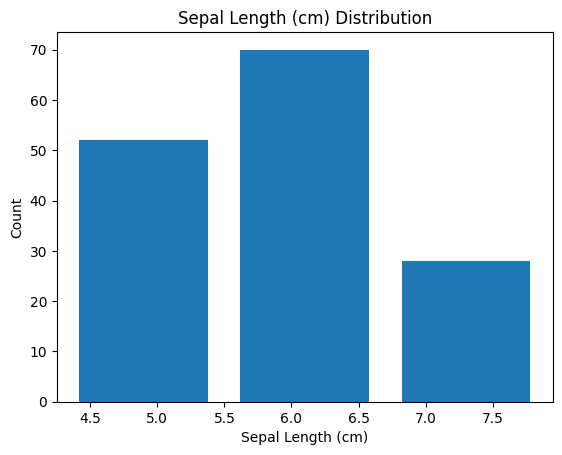

In [346]:
# calling the plt.hist() function to plot a histogram of the sepal length column
# I set the number of bins (columns) to 3 and the width of the bars to 0.8
plt.hist(iris_array[:, 1], bins=3, rwidth=0.8)

# I set the x-axis label to 'Sepal length (cm)', the y-axis label to 'Count', and the title to 'Sepal Length (cm) distribution'
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Count')
plt.title('Sepal Length (cm) Distribution')
plt.show()

### Sepal Width (cm)

This histogram shows the Sepal Length (cm) data. Again, I played around with number of bins, and found that 4 bins gave me the clearest insight this time, which is that the majority of iris flowers regardless of species have sepal width in the range of approximately 2.5 to 3.1 cm.

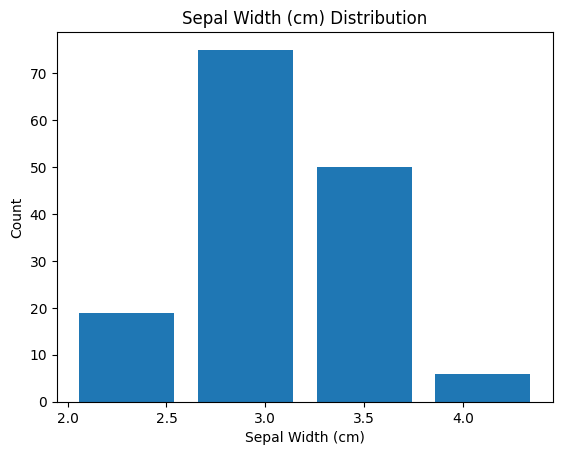

In [347]:
plt.hist(iris_array[:, 2], bins=4, rwidth=0.8)
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Count')
plt.title('Sepal Width (cm) Distribution')
plt.show()

### Petal Length (cm)

This histogram shows the Petal Length (cm) data. Again, I played around with number of bins, and found that 4 bins gave me the good insight. This histogram indicates that that by a small margin, the majority of plants have a petal length of between 1 and 2 cm.

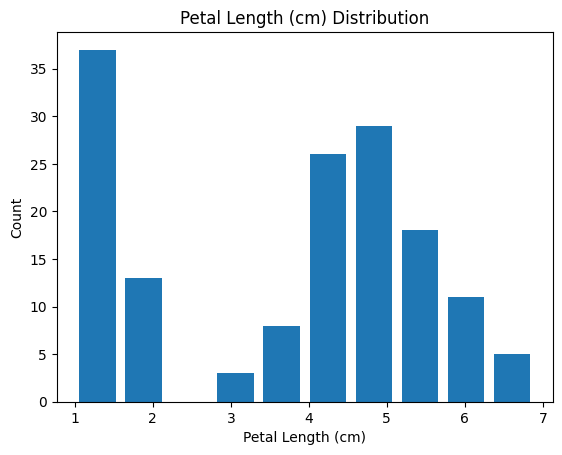

In [348]:
plt.hist(iris_array[:, 3], bins=10, rwidth=0.8)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Count')
plt.title('Petal Length (cm) Distribution')
plt.show()

#### Petal Width (cm)

This histogram shows the Petal Width (cm) data. Five bins gave me the best looking graph this time, showing that the majority of samples have a Petal Width of between 0 and 0.5 cm.

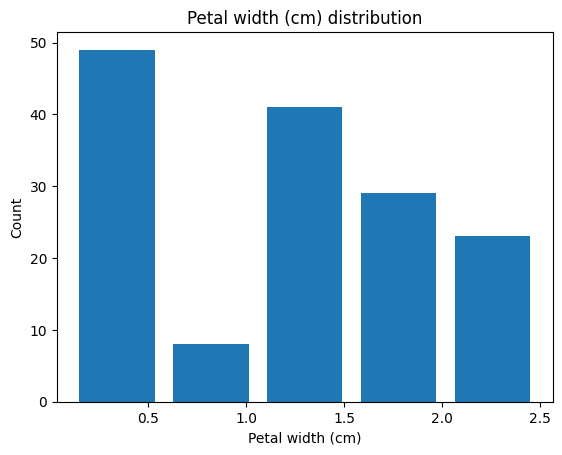

In [349]:
plt.hist(iris_array[:, 4], bins=5, rwidth=0.8)
plt.xlabel('Petal width (cm)')
plt.ylabel('Count')
plt.title('Petal width (cm) distribution')
plt.show()

### Task 5 
#### Investigate relationships

**Purpose of below code cells for Task 4**

Below I use the [pyplot method plt.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) to generate a scatter plot of the data of two features across the three species of Iris flower: Sepal Length and Petal Length.

I referred to [the documentation here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) in order to figure out how to display the data points in a clear way which helped to make any relationship between the two features stand out.

I used my previously generated Pandas DataFrame 'df' here, but added in a column called 'class_id' with a number corresponding to each species of iris flower (0, 1, 2) that could be passed to the plt.scatter function's colour argument ('c') in order to colour the points.

I then passed '.' as a value for the 'marker' argument, making the dots slightly smaller than default for readability.

    species_name  sepal length (cm)  sepal width (cm)  petal length (cm)  \
0         setosa                5.1               3.5                1.4   
1         setosa                4.9               3.0                1.4   
2         setosa                4.7               3.2                1.3   
3         setosa                4.6               3.1                1.5   
4         setosa                5.0               3.6                1.4   
..           ...                ...               ...                ...   
145    virginica                6.7               3.0                5.2   
146    virginica                6.3               2.5                5.0   
147    virginica                6.5               3.0                5.2   
148    virginica                6.2               3.4                5.4   
149    virginica                5.9               3.0                5.1   

     petal width (cm)  
0                 0.2  
1                 0.2  
2              

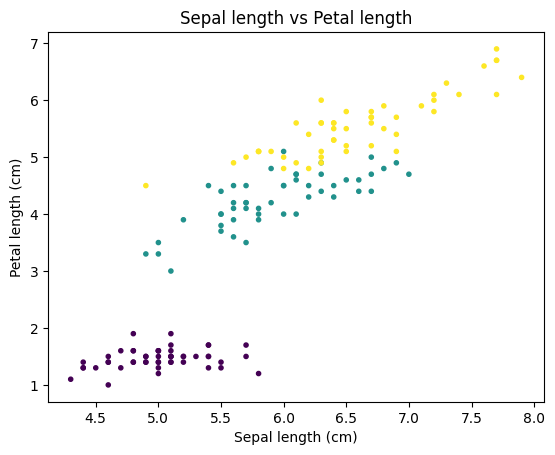

In [350]:
print(df)

df['class_id'] = data.target

# I then create a scatter plot to see whether there is a relatioship between petal length and sepal length
# by first defining the x and y values for the scatter plot, specifying the marker type and feature to colour each point by

plt.scatter(df['sepal length (cm)'], df['petal length (cm)'], marker='.', c=df['class_id'])

# setting labels and title
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.title('Sepal length vs Petal length')


# displaying the plot
plt.show()


### Task 6
#### Analayse relationship

**Purpose of below code cells for Task 6**

Working from [this reference](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html), in the code cells below I simply replot my scatter plot as I did in the previous task, and then use numpy.polyfit to add a regression line to it.

The numpy polyfit() function calculates the 'least squares fit' for the data - this is a mathematical approach for finding the best fit line for a set of data points.

My conversations with copilot on this can be found [here](https://copilot.microsoft.com/shares/BJDVX1C1dueFC5DUkQW31) and [here](https://copilot.microsoft.com/shares/F4JZZTx52WiB292SvaN8t).

The numpy polyfit() function requires an x and y value in order to calculate the best fit line. My scatter plot plots the sepal length (cm) on the x axis and the petal length (cm) on the y axis, so I use these values as my x and y values by storing them as variables. After running into some errors, I doscovered that I'd need to specify the type of these variables as float types, before passing them to the numpy.polyfit() function.

 I then store the result of the function to the variables m and c, so that I can plug these into the slope formula to get my best fit line.

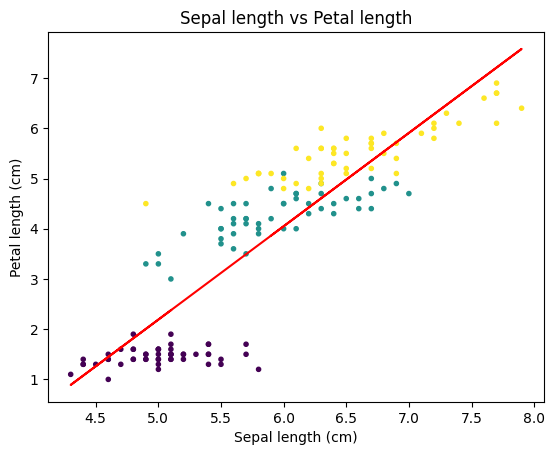

In [351]:
# replotting my scatter plot as in the above cell
plt.scatter(df['sepal length (cm)'], df['petal length (cm)'], marker='.', c=df['class_id'])

plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.title('Sepal length vs Petal length')

# setting the x and y values as explained above
# and specified the data type as float
x = np.array(iris_array[:, 1], dtype=float)
y = np.array(iris_array[:, 3], dtype=float)

# below I use the numpy polyfit() function to calculate the least squares fit for the data, storing the slope and intercept of the line
# in the variables m and c
# I set the degree argument which is the thrird argument in the polyfit() function to 1, as I want to fit a straight line to the data
# and don't need to allow for curves by including a higher degree polynomial
m, c = np.polyfit(x, y, 1)

# now that I've calculated the slope and intercept of the line using the numpy polyfit() function, I can plot the line on top of my scatter plot
# I do this by using the plt.plot() function to plot the line, specifying the x values as the x values of the scatter plot
plt.plot(x, m*x + c, color='red')

plt.show()


### Task 7
#### Analyse class distributions

**Purpose of code cells below for Task 7**

In the code cells below, I create subgroups for each species of Iris flowers' petal length measurements.

I then create a box plot using the ax.boxplot() method.

**Reflection on output**
The box plot clearly shows us that the virginica species has the greatest median petal length, and setosa the lowest.

[[np.str_('setosa') 5.1 3.5 1.4 0.2]
 [np.str_('setosa') 4.9 3.0 1.4 0.2]
 [np.str_('setosa') 4.7 3.2 1.3 0.2]
 [np.str_('setosa') 4.6 3.1 1.5 0.2]
 [np.str_('setosa') 5.0 3.6 1.4 0.2]
 [np.str_('setosa') 5.4 3.9 1.7 0.4]
 [np.str_('setosa') 4.6 3.4 1.4 0.3]
 [np.str_('setosa') 5.0 3.4 1.5 0.2]
 [np.str_('setosa') 4.4 2.9 1.4 0.2]
 [np.str_('setosa') 4.9 3.1 1.5 0.1]
 [np.str_('setosa') 5.4 3.7 1.5 0.2]
 [np.str_('setosa') 4.8 3.4 1.6 0.2]
 [np.str_('setosa') 4.8 3.0 1.4 0.1]
 [np.str_('setosa') 4.3 3.0 1.1 0.1]
 [np.str_('setosa') 5.8 4.0 1.2 0.2]
 [np.str_('setosa') 5.7 4.4 1.5 0.4]
 [np.str_('setosa') 5.4 3.9 1.3 0.4]
 [np.str_('setosa') 5.1 3.5 1.4 0.3]
 [np.str_('setosa') 5.7 3.8 1.7 0.3]
 [np.str_('setosa') 5.1 3.8 1.5 0.3]
 [np.str_('setosa') 5.4 3.4 1.7 0.2]
 [np.str_('setosa') 5.1 3.7 1.5 0.4]
 [np.str_('setosa') 4.6 3.6 1.0 0.2]
 [np.str_('setosa') 5.1 3.3 1.7 0.5]
 [np.str_('setosa') 4.8 3.4 1.9 0.2]
 [np.str_('setosa') 5.0 3.0 1.6 0.2]
 [np.str_('setosa') 5.0 3.4 1.6 0.4]
 

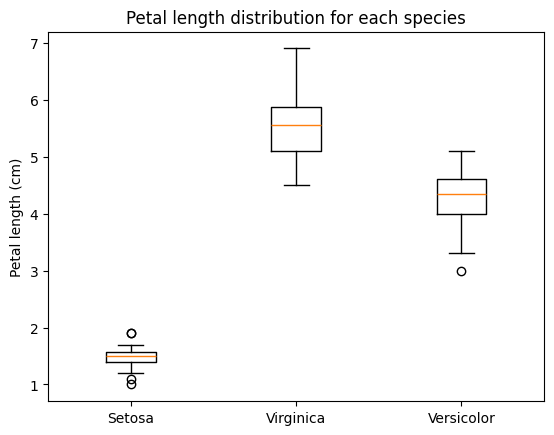

In [352]:
# I create subgroups for each species first of all by indexing and slicing the iris_array
setosa_pl = iris_array[iris_array[:, 0] == 'setosa'][:, 3]
virginica_pl = iris_array[iris_array[:, 0] == 'virginica'][:, 3]
versicolor_pl = iris_array[iris_array[:, 0] == 'versicolor'][:, 3]

#checking subgroups are correct by printing them out and cross referencing them with the iris_array values
# I put a blank print statement in between each print statement to make the outputit easier to read
print(iris_array)
print()
print(setosa_pl)
print()
print(versicolor_pl)
print()
print(virginica_pl)

# I then create a figure and axis for the plot
fig, ax = plt.subplots()

# I then generate a boxplot for the petal length of each species using the ax.boxplot() method
# The list inside ax.boxplot() contains petal length data for Setosa, Virginica, and Versicolor
ax.boxplot([setosa_pl, virginica_pl, versicolor_pl])

# and set x-axis labels to indicate the species corresponding to each boxplot
ax.set_xticklabels(['Setosa', 'Virginica', 'Versicolor'])

# I then label the y-axis to indicate the measurement unit for petal length
plt.ylabel('Petal length (cm)')

# and set a title for the boxplot to provide context
plt.title('Petal length distribution for each species')

# Finally, I display the plot
plt.show()




### Task 8
#### Compute correlations

**Purpose of below code cells for Task 8**
After trying multiple times to use the numpy.corrcoef() fucntion and failing, I asked copilot for a steer ([conversation here](https://copilot.microsoft.com/shares/kqJ1efoaWdcMEK4YbtLq1)). It suggested the pandas dataframe df.corr() function. I decided to try it seeing as the reason I was struggling to use the numpy.corrcoef() function was due to it needing to be a specific kind of array, perhaps using a dataframe instead might make things easier.

I reloaded the iris dataset using the sklearn library, as I'd already manipulated the dataset quite a bit so far and decided it would be easier to bring it in fresh. I set the columns as the feature names when creating the dataframe, and called the df.corr() function on the data.

I printed out the result, seeing a matrix of values ranging from -1 to 1, and proceeded to map this visually as a heat map using seaborn. The resulting heat map shows strong correlation between sepal length and petal width, sepal length and petal length, and so on - indicated by the colour and number on each square.



                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


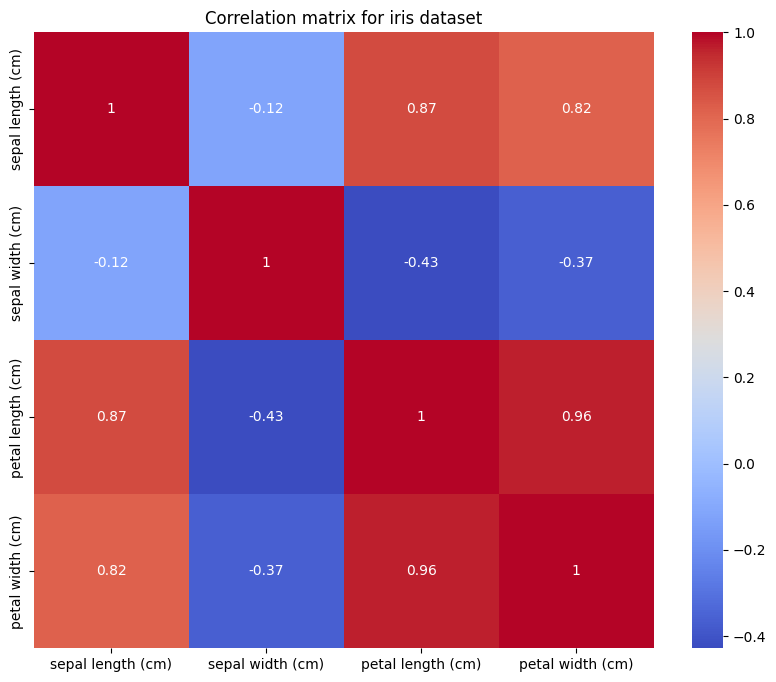

In [353]:
# loading in iris dataset from scratch using the sklearn library
iris = datasets.load_iris()

# creating a dataframe
df_heatmap = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# calling the df.corr() function to calculate the correlation matrix between the features in my dataframe
feature_matrix = df_heatmap.corr()
# checking my resut
print(feature_matrix)

# creating a heatmap to visualise the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(feature_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix for iris dataset')
plt.show()


### Task 9
#### Fit a simple linear regression

I began by working from [this resource](https://www.askpython.com/python/coefficient-of-determination). I decided to use sklearn's r2_Score() function. After running into some problems, I read the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) to understand where I might be going wrong. I learned that the sklearn's r2_score() function requires actual y values (in our case, the sepal length data), and predicted y values. To generate predicted y values, we have to use numpy's polyfit function. This will take our actual data, and fit a line to it i.e it will generate a list of y values that are the best fit for our data.

We can then pass this data generated through the numpy.polyfit function to the r2_score() fucntion along with our actual y values to generate the coefficient of determination r^2 and fit it to our graph.



[2.37656482 2.00487822 1.63319163 1.44734833 2.19072152 2.93409471
 1.44734833 2.19072152 1.07566173 2.00487822 2.93409471 1.81903493
 1.81903493 0.88981844 3.6774679  3.49162461 2.93409471 2.37656482
 3.49162461 2.37656482 2.93409471 2.37656482 1.44734833 2.37656482
 1.81903493 2.19072152 2.19072152 2.56240812 2.56240812 1.63319163
 1.81903493 2.93409471 2.56240812 3.11993801 2.00487822 2.19072152
 3.11993801 2.00487822 1.07566173 2.37656482 2.19072152 1.26150503
 1.07566173 2.19072152 2.37656482 1.81903493 2.37656482 1.44734833
 2.74825142 2.19072152 5.90758748 4.79252769 5.72174418 3.11993801
 4.97837099 3.49162461 4.60668439 2.00487822 5.16421429 2.56240812
 2.19072152 3.8633112  4.0491545  4.2349978  3.30578131 5.35005758
 3.30578131 3.6774679  4.4208411  3.30578131 3.8633112  4.2349978
 4.60668439 4.2349978  4.79252769 5.16421429 5.53590088 5.35005758
 4.0491545  3.49162461 3.11993801 3.11993801 3.6774679  4.0491545
 2.93409471 4.0491545  5.35005758 4.60668439 3.30578131 3.119938

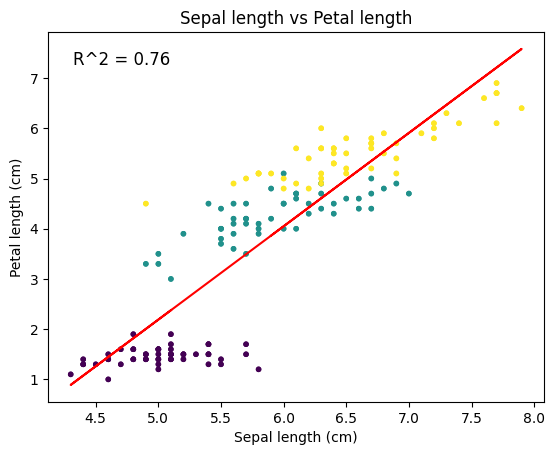

In [354]:
# replotting my scatter plot as in the above cell
plt.scatter(df['sepal length (cm)'], df['petal length (cm)'], marker='.', c=df['class_id'])

plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.title('Sepal length vs Petal length')

# calculating the coefficient of determination (R^2) for the linear regression line using the sklearn library's r2_score() function

# I first need to create the y values for the linear regression line using the numpy polyfit() function
# I make sure to specify the data type as float, as the polyfit() function requires the x and y values to be of type float
x = np.array(iris_array[:, 1], dtype=float)
y = np.array(iris_array[:, 3], dtype=float)
m, c = np.polyfit(x, y, 1)

# I then use the slope formula to calculate the y values for the linear regression line
y_pred = m*x + c

# as you can see from the printed result, we now have a set of predicted y values stored in the variable y_pred
print(y_pred)

# I then use the sklearn library's r2_score() function to calculate the coefficient of determination (R^2) for the linear regression line
r2 = r2_score(y, y_pred)

#print(f"The coefficient of determination (R^2) for the linear regression line is {r2}")

# I then use matplotlib.pyplot to annotate this information to my scatter plot, and reshow the scatter plot
plt.annotate(f"R^2 = {r2:.2f}", xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, ha='left', va='top')
plt.scatter(df['sepal length (cm)'], df['petal length (cm)'], marker='.', c=df['class_id'])
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.title('Sepal length vs Petal length')
# I also decided to plot the linear regression line for additional context
plt.plot(x, m*x + c, color='red')
plt.show()


### Task 10
#### Use seaborn to create a pairplot of data set and explain in your own words what it depicts

I initially worked from [this resource](https://builtin.com/articles/seaborn-pairplot#:~:text=Seaborn%20Pairplot%20is%20a%20Python%20library%20that%20allows%20you%20to,the%20figure%20size%20and%20styling.) to understand what a pairplot is and how to produce one.

I reloaded in the iris dataset, as when I tried to reuse my 'df' dataframe from Task 8, I was missing the class_id column, which I found I'd need in order to use the pairplot()'s 'hue' argument. This colours the points on each graph based on a category or class in the data.

### explanation of what pairplot depicts
The resulting pairplot plots a scatter plot for every possible pairing in the dataset. For example, the scatter plot in the bottom left depicts the relationship between sepal length and petal width. The graph to its right displays the relationship between sepal width and petal width, the top right petal width and sepal length, and so on. The graphs along the diagonal need to be interpreted differently. Each feature intersects with itself here in terms of axis labelling, but the plot does not map that relationship of course. Instead, these plots depict the distribution of each variable.

The distribution of each variable refers to.....

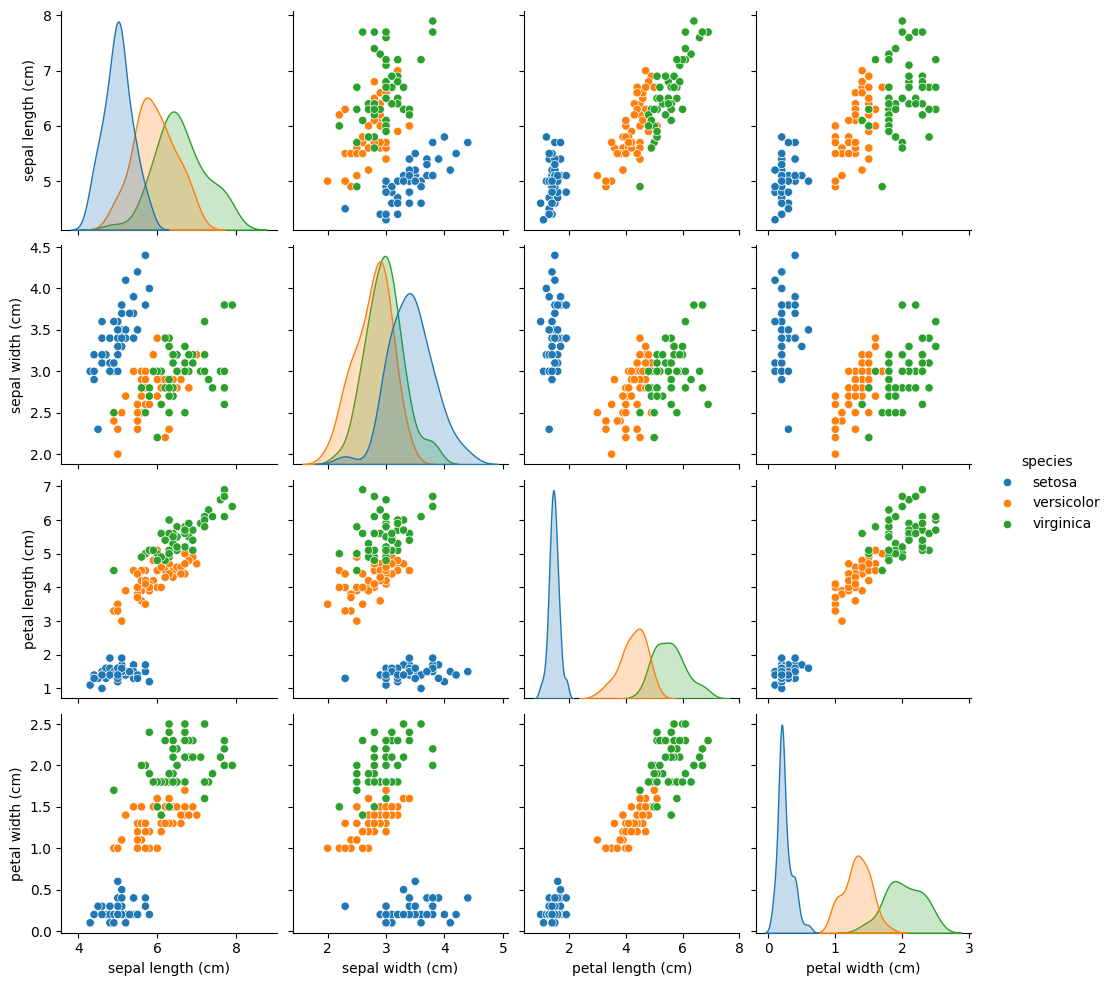

In [355]:
# as explained above, I reload the iris dataset using the sklearn library
iris = datasets.load_iris()

# I then create a dataframe with the feature names as the column names
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# and add a new column to the dataframe called 'species' containing the species name for each flower
# I can pass the data in this column to pairplot()'s hue argument to colour the points in the scatter plot by species
df['species'] = iris.target_names[iris.target]

# I then use the seaborn library's pairplot() function to create a scatter plot matrix of the features in the dataframe
sns.pairplot(df, hue='species')